In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Text(0, 0.5, 'Amplitude')

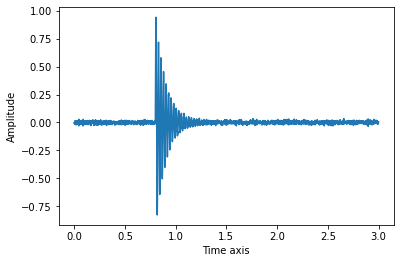

In [2]:
# make time series data 
mu, sigma = 0, 0.01 # mean and standard deviation of noise
dt = 0.001
tmax = .8
t = np.arange(0,tmax+dt,dt)
y = np.sin(80*np.pi*t)*np.exp(-10*t) # signal
ny = y.shape[0]
s = np.random.normal(mu, sigma, 3001)
idx = int(tmax/dt)
s[idx:idx+ny] = s[idx:idx+ny] + y
t = np.arange(0,3.0+dt,dt)
#plot a random signle trace
n = np.random.randint(low=0,high=49)
plt.plot(t,s)
plt.xlabel('Time axis');plt.ylabel('Amplitude')

In [3]:
# different mean calculations

def mean_np(x,w):
    m = np.convolve(x,np.ones(w)) / w
    return m[:x.shape[0]]

def mean(x,w):
    m = np.cumsum(x)
    m[w:] = m[w:] - m[:-w]
    m /= w
    return m

def mean_df(x,w):
    df = pd.DataFrame(columns=['x'])
    df['x'] = x
    m = df['x'].rolling(window=w).mean()
    return m

(3001,) (3001,) (3001,)


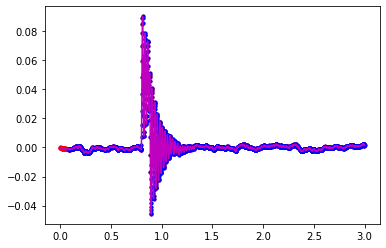

In [4]:
smth0 = mean_np(s,81)
smth1 = mean(s,81)
smth2 = mean_df(s,81)
plt.plot(t,smth0,'r.')
plt.plot(t,smth2,'b.')
plt.plot(t,smth1,'m')
print (smth0.shape,smth1.shape,smth2.shape)

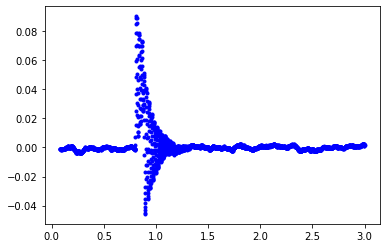

In [5]:
# when window is negative
smth1 = mean(s,81)
plt.plot(t,smth2,'b.')